In [1]:
import pandas as pd
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(train_identity.head())

   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                  

In [4]:
print(train_transaction.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [5]:
train = train_identity.merge(train_transaction,how='inner',on=['TransactionID'])

In [6]:
print(train.shape)
print(train.columns)

(144233, 434)
Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=434)


In [7]:
cols_with_nan = []
for col in train.columns:
    if(pd.isnull(train[col]).sum() >0):#more than 1 Nan
        cols_with_nan.append(col)
print(len(cols_with_nan))
cols_with_only_nan = []
for col in train.columns:
    if(pd.isnull(train[col]).sum()==train.shape[0]):#only Nan
        cols_with_only_nan.append(col)
print(cols_with_only_nan)
print(len(cols_with_only_nan))

412
['dist1', 'D11', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
21


In [8]:
train['id_11'].value_counts(dropna=False,normalize=True) #continous 1-11

100.000000    0.923242
NaN           0.022568
95.080002     0.008535
95.160004     0.005228
97.120003     0.003051
                ...   
99.099998     0.000007
99.040001     0.000007
98.970001     0.000007
98.699997     0.000007
91.150002     0.000007
Name: id_11, Length: 366, dtype: float64

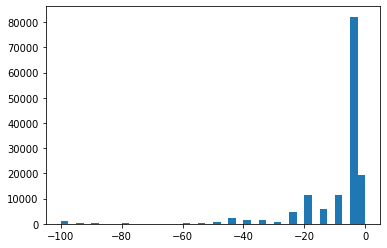

In [9]:
plt.hist(train['id_01'],bins = 40)
plt.show()

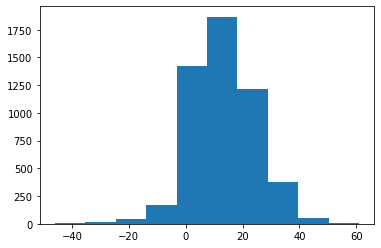

In [10]:
plt.hist(train['id_07'][~np.isnan(train['id_07'])])#https://stackoverflow.com/questions/54615686/how-to-plot-a-histogram-with-nan
plt.show()

In [11]:
train['id_12'].value_counts(dropna=False) #only 2 types

NotFound    123025
Found        21208
Name: id_12, dtype: int64

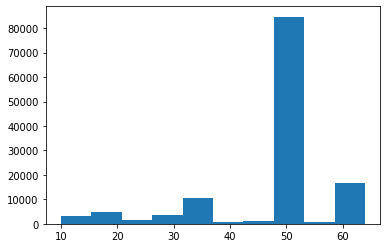

In [12]:
plt.hist(train['id_13'][~np.isnan(train['id_13'])])#https://stackoverflow.com/questions/54615686/how-to-plot-a-histogram-with-nan
plt.show()

In [13]:
train['id_12'].value_counts().plot(kind='bar')
plt.show()

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

In [ ]:
train['id_15'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print(train['id_16'].value_counts())

train['id_16'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print(train['id_28'].value_counts())

train['id_28'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print(train['id_29'].value_counts())

train['id_29'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print(train['id_34'].value_counts())

train['id_34'].value_counts().plot(kind='bar')
plt.show() 

In [ ]:
#35,36,37,38 all T or F

train['id_35'].value_counts().plot(kind='bar')
#train['id_36'].value_counts().plot('bar')
#train['id_37'].value_counts().plot('bar')
#train['id_38'].value_counts().plot('bar')

plt.show()

In [ ]:
(train['DeviceInfo'].value_counts()[:26]).plot(kind='bar')
plt.show()


In [ ]:
(train['P_emaildomain'].value_counts()[:26]).plot(kind='bar')
plt.show()


In [ ]:
(train['addr1'].value_counts())


In [ ]:
plt.hist(train['addr1'][~np.isnan(train['addr1'])])#https://stackoverflow.com/questions/54615686/how-to-plot-a-histogram-with-nan
plt.show()

In [ ]:
##data explanation
#identity table contains info about network connection(ip,isp etc) and digital signature associated with transactions
#id 1-38 masked info, deviceinfo + devicetype
#transaction table 
#transactionDT - seconds, 1st entry = 24*60*60 , try to make new column -  time_of_day from this
#transactionamt - usd !!
#productCD - no clue, but only 4 values but each of them corresponds to type of product (service, automobile etc) !!
#addr1 and addr2 is billing region and billing country respectively
#C1-C14 counts of phone number* associated with user. * could be anything depending upon i-th 
#D1-15 timedelta , unkown D1 is number of days before prev transaction same user. Most common value 0.0 so #1st trasaction
#M1-M9 all nan so leave
#V1 - V11 all nan
#V12-V339 vesta engineered features. Hidden meaning,including ranking ,counting etc
#
#

In [ ]:
#productCD
train['ProductCD'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#addr2
plt.hist(train['addr2'][~np.isnan(train['addr2'])])#https://stackoverflow.com/questions/54615686/how-to-plot-a-histogram-with-nan
plt.show()

In [ ]:
#r_email
train['R_emaildomain'].value_counts()[:26].plot(kind='bar')
plt.show()

In [ ]:
#C1
train['C1'].value_counts()[:26].plot(kind='bar')
plt.show()

In [ ]:
#D1
train['D1'].value_counts()[:26].plot(kind='bar')
plt.show()

In [ ]:
#isfraud
train['isFraud'].value_counts().plot(kind='bar')
plt.show()
print(train['isFraud'].value_counts())
#class imbalance

In [ ]:
# adding new column time_of_day
print(len(train['TransactionDT']))
lis_of_times = []
cur_time = 0 #12 pm
for i in range(len(train['TransactionDT'])):
    diff = train['TransactionDT'][i] - train['TransactionDT'][0]
    lis_of_times.append((cur_time + diff//(60*60))%24)
print(len(lis_of_times))
lis_of_times = np.array(lis_of_times)
train['time_of_day'] = pd.Series(lis_of_times,index=train.index)
print(train.head())

In [ ]:
(train['time_of_day'].value_counts()).plot(kind='bar')
plt.show()

In [ ]:
#stuff to do
#1.add new columns from combinations of old columns
#2. Plot TSNE


In [ ]:
#transaction min mean 

lis_of_trans_min_mean = []
cur_mean=train['TransactionAmt'].mean()
for i in range(len(train['TransactionAmt'])):
    diff = train['TransactionAmt'][i] - curr_mean
    lis_of_trans_min_mean.append(diff)
print(len(lis_of_trans_min_mean))
lis_of_trans_min_mean = np.array(lis_of_trans_min_mean)
train['Trans_min_mean'] = pd.Series(lis_of_trans_min_mean,index=train.index)
print(train.head())

In [ ]:
train['Trans_min_std'] = train['Trans_min_mean'] / train['TransactionAmt'].std()
lis_of_trans_min_std = []
cur_std=train['Trans_min_mean'].std()
for i in range(len(train['Trans_min_mean'])):
    diff = train['Trans_min_mean'][i] / curr_std
    lis_of_trans_min_std.append(diff)
print(len(lis_of_trans_min_std))
lis_of_trans_min_std = np.array(lis_of_trans_min_std)
train['Trans_min_mean'] = pd.Series(lis_of_trans_min_std,index=train.index)
print(train.head())


In [ ]:

train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('std')
